In [1]:
## 03-Classification-Homework

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
### Dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

data = pd.read_csv(url)
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
data.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [5]:
# data — check and fill missing
data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
data.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [7]:
# categorical 'NA', numerical 0.0

In [8]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['lead_source', 'industry', 'employment_status', 'location']

In [9]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [10]:
prep_data = data.copy()
for c in cat_cols:
    prep_data[c] = prep_data[c].fillna('NA')
for c in num_cols:
    prep_data[c] = prep_data[c].fillna(0.0)

In [11]:
prep_data.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [12]:
## Q1: mode for industry
industry_mode = prep_data['industry'].mode().iloc[0]
industry_mode


'retail'

In [13]:
# Q2: correlation matrix
corr = prep_data[num_cols].corr()
corr

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


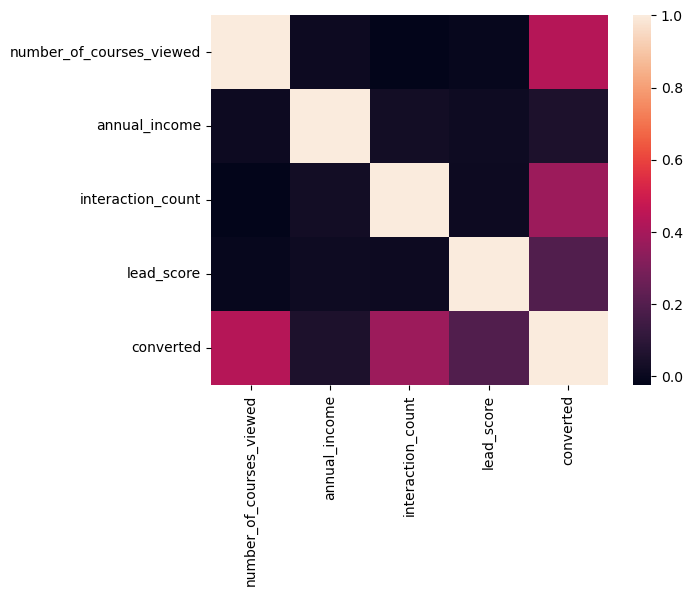

In [14]:
axis_corr = sns.heatmap(corr)
plt.show()

In [15]:
corr = prep_data[num_cols].corr()
pairs = [
    ("interaction_count", "lead_score"),
    ("number_of_courses_viewed", "lead_score"),
    ("number_of_courses_viewed", "interaction_count"),
    ("annual_income", "interaction_count"),
]

for a, b in pairs:
    print(f"{a} and {b}: {corr.loc[a, b]:.3f}")

interaction_count and lead_score: 0.010
number_of_courses_viewed and lead_score: -0.005
number_of_courses_viewed and interaction_count: -0.024
annual_income and interaction_count: 0.027


In [16]:
prep_data.converted

0       1
1       0
2       1
3       0
4       1
       ..
1457    1
1458    1
1459    1
1460    1
1461    1
Name: converted, Length: 1462, dtype: int64

In [17]:
### Split the data
"""
* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.
"""
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(prep_data, test_size=0.2, random_state=42)
len(df_full_train), len(df_test)

(1169, 293)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val)

(876, 293)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [21]:
df_full_train.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [22]:
df_full_train.converted.value_counts()

converted
1    710
0    459
Name: count, dtype: int64

In [23]:
df_full_train.converted.value_counts(normalize= True)

converted
1    0.607357
0    0.392643
Name: proportion, dtype: float64

In [24]:
global_rate = df_full_train.converted.mean()
round(global_rate, 2)

0.61

In [25]:
cats = df_full_train.select_dtypes(include=['object']).columns.tolist()
cats

['lead_source', 'industry', 'employment_status', 'location']

In [26]:
from IPython.display import display

for c in cats:
    print(c)
    df_group = df_full_train.groupby(c).converted.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_rate
    df_group["risk"] = df_group["mean"] / global_rate
    df_group.sort_values("risk", ascending=False, inplace=True)
    display(df_group)
    print()

lead_source


,mean,count,diff,risk
lead_source,,,,
referral,0.786408,206,0.179051,1.294804
NA,0.669725,109,0.062368,1.102688
organic_search,0.615721,229,0.008364,1.013771
events,0.592965,199,-0.014392,0.976304
social_media,0.583333,216,-0.024023,0.960446
paid_ads,0.428571,210,-0.178785,0.705634



industry


,mean,count,diff,risk
industry,,,,
education,0.790210,143,0.182853,1.301064
manufacturing,0.621429,140,0.014072,1.023169
other,0.612903,155,0.005547,1.009132
healthcare,0.593333,150,-0.014023,0.976911
retail,0.566265,166,-0.041092,0.932343
technology,0.562963,135,-0.044394,0.926907
NA,0.557522,113,-0.049835,0.917948
finance,0.556886,167,-0.050470,0.916901



employment_status


,mean,count,diff,risk
employment_status,,,,
employed,0.671937,253,0.064580,1.106330
student,0.659722,288,0.052366,1.086219
self_employed,0.635739,291,0.028382,1.046731
NA,0.571429,84,-0.035928,0.940845
unemployed,0.462451,253,-0.144906,0.761415



location


,mean,count,diff,risk
location,,,,
NA,0.680000,50,0.072643,1.119606
middle_east,0.644172,163,0.036815,1.060615
europe,0.641176,170,0.033820,1.055684
australia,0.612903,155,0.005547,1.009132
africa,0.592857,140,-0.014500,0.976127
north_america,0.589888,178,-0.017469,0.971238
asia,0.588608,158,-0.018749,0.969130
south_america,0.554839,155,-0.052518,0.913530


In [27]:
# Q3: mutual score
from sklearn.metrics import mutual_info_score

def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.converted)

    

In [28]:
df_mutual_score = df_full_train[cats].apply(mutual_info_target_score).round(2)
df_mutual_score = df_mutual_score.sort_values(ascending=False)

display(df_mutual_score)

lead_source          0.03
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

In [29]:
# Q4: train logistic

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [31]:
y_pred = model.predict(X_val)
# y_pred

In [32]:
accuracy = round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.7


In [33]:
# Q5: least important
small = ['industry', 'employment_status', 'lead_score']
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'industry': 'retail', 'employment_status': 'student', 'lead_score': 0.03},
 {'industry': 'manufacturing',
  'employment_status': 'student',
  'lead_score': 0.77},
 {'industry': 'technology',
  'employment_status': 'employed',
  'lead_score': 0.59},
 {'industry': 'technology',
  'employment_status': 'employed',
  'lead_score': 0.34},
 {'industry': 'retail', 'employment_status': 'student', 'lead_score': 0.98},
 {'industry': 'retail', 'employment_status': 'student', 'lead_score': 1.0},
 {'industry': 'finance',
  'employment_status': 'unemployed',
  'lead_score': 0.73},
 {'industry': 'retail', 'employment_status': 'student', 'lead_score': 0.38},
 {'industry': 'NA', 'employment_status': 'employed', 'lead_score': 0.28},
 {'industry': 'education', 'employment_status': 'student', 'lead_score': 0.01}]

In [34]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [35]:
# vector
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [36]:
dv_small.get_feature_names_out()

array(['employment_status=NA', 'employment_status=employed',
       'employment_status=self_employed', 'employment_status=student',
       'employment_status=unemployed', 'industry=NA',
       'industry=education', 'industry=finance', 'industry=healthcare',
       'industry=manufacturing', 'industry=other', 'industry=retail',
       'industry=technology', 'lead_score'], dtype=object)

In [37]:
# transform val
X_train_small = dv_small.transform(dicts_train_small)

In [38]:
# model_small
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [39]:
w0 = model_small.intercept_[0]
w0

-0.2716435302206023

In [40]:
model_small.coef_[0]

array([-2.73674256e-01,  3.34266266e-01,  1.35847619e-01,  2.71163085e-01,
       -7.16458383e-01, -2.58032039e-01,  7.90183240e-01, -3.15455332e-01,
       -1.19689862e-01,  6.13187530e-02,  5.52444975e-04, -2.91319548e-01,
       -1.16413326e-01,  1.69622081e+00])

In [41]:
features = df_train.columns.to_list()
features

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score']

In [42]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [43]:
scores

,eliminated_feature,accuracy,difference
0,lead_source,0.703072,-0.003072
1,industry,0.699659,0.000341
2,number_of_courses_viewed,0.556314,0.143686
3,annual_income,0.853242,-0.153242
4,employment_status,0.696246,0.003754
5,location,0.709898,-0.009898
6,interaction_count,0.556314,0.143686
7,lead_score,0.706485,-0.006485


In [44]:
features = ['industry', 'employment_status', 'lead_score']
original_score = accuracy
scoress = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scoress.loc[len(scores)] = [feature, score, original_score - score]

In [45]:
scoress

,eliminated_feature,accuracy,difference
8,lead_score,0.624573,0.075427


In [46]:
# Q6: logistic regression C: [0.01, 0.1, 1, 10, 100]

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)


In [54]:
scores = {}
for C in [0.01, 0.1, 1, 10, 100]:

    model = LogisticRegression(
        C=C, solver="liblinear", random_state=42, max_iter=1000
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(
        y_val,
        y_pred,
    )
    scores[C] = round(score, 3)
    print(f"C ={C}: accuracy_score ={round(score, 3)}")
    print(scores[C])

C =0.01: accuracy_score =0.7
0.7
C =0.1: accuracy_score =0.7
0.7
C =1: accuracy_score =0.7
0.7
C =10: accuracy_score =0.7
0.7
C =100: accuracy_score =0.7
0.7
